# Explorative Data Analysis

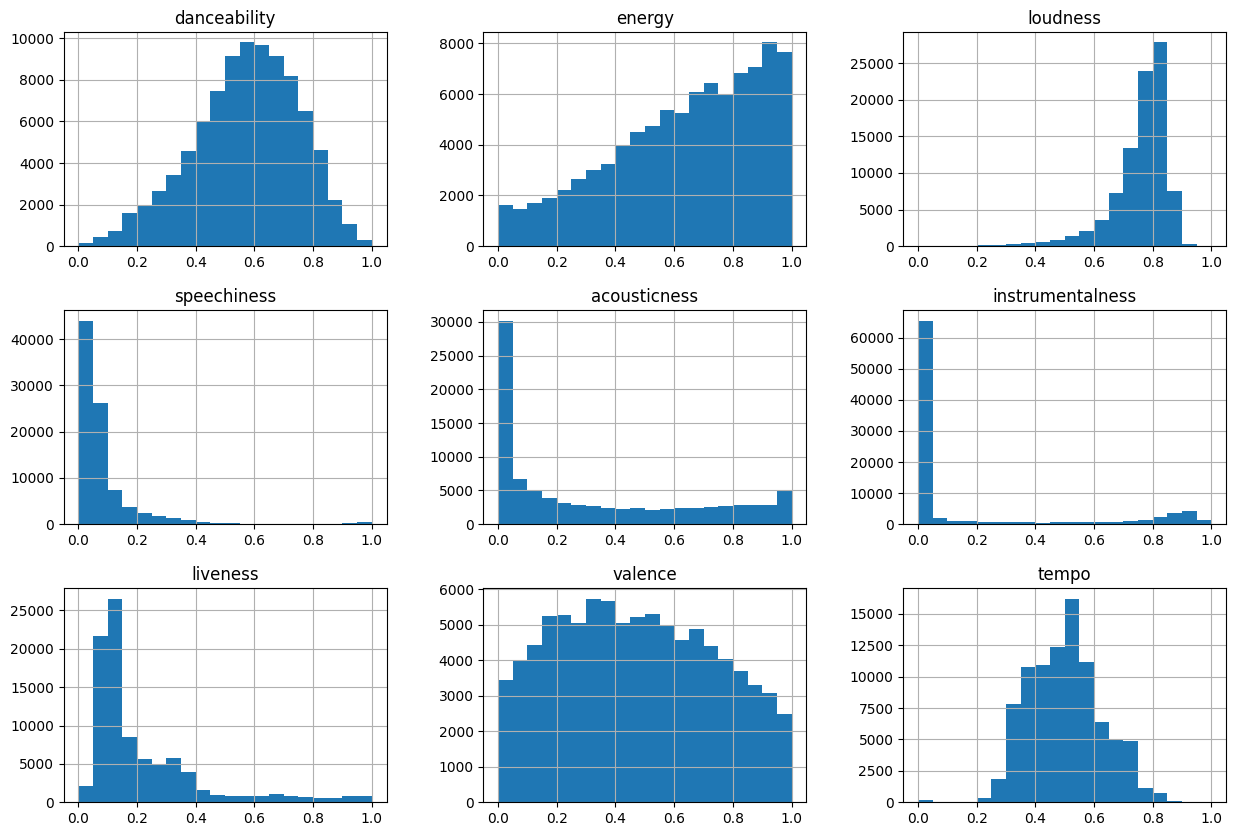

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_generel = pd.read_csv('generel_data.csv')

# List of features to analyze
features_to_analyze = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Feature distribution plots
df_generel[features_to_analyze].hist(bins=20, figsize=(15, 10))
plt.show()



### Danceability, Energy & Valence

It seems that most songs are relatively danceble since they peak around 0.6 and diagram is skewed towards higher values. They also look to be highly energetic but huge range in mood (valence).

### Spechiness
The skewed speechiness diagram towards low indicates most of the tacks are music-heavy. 

### Instrumentalness
The likelihood that the track contains no vocals is very low for most tracks.

### Loudness
Most songs tend to have higher loudness values, skewed towards 0.8. This makes sense because loudness is a key factor in popular music, where tracks are generally mastered to be loud.

### Acousticness

The distribution is U-shaped, meaning that there’s a split: many songs are either very acoustic (close to 1.0) or not acoustic at all (close to 0.0). This could reflect the distinction between more electronically produced music versus acoustic music.

### Liveness
Skewed heavily towards low values (close to 0.0), indicating that most tracks are not live performances. Only a small fraction of songs might include live audience noise or be live recordings.

### Tempo
Tempo appears to have a more normal distribution, centered around typical BPM values for popular songs, possibly between 100 and 140 BPM, which is consistent with common tempos for dance and pop music.

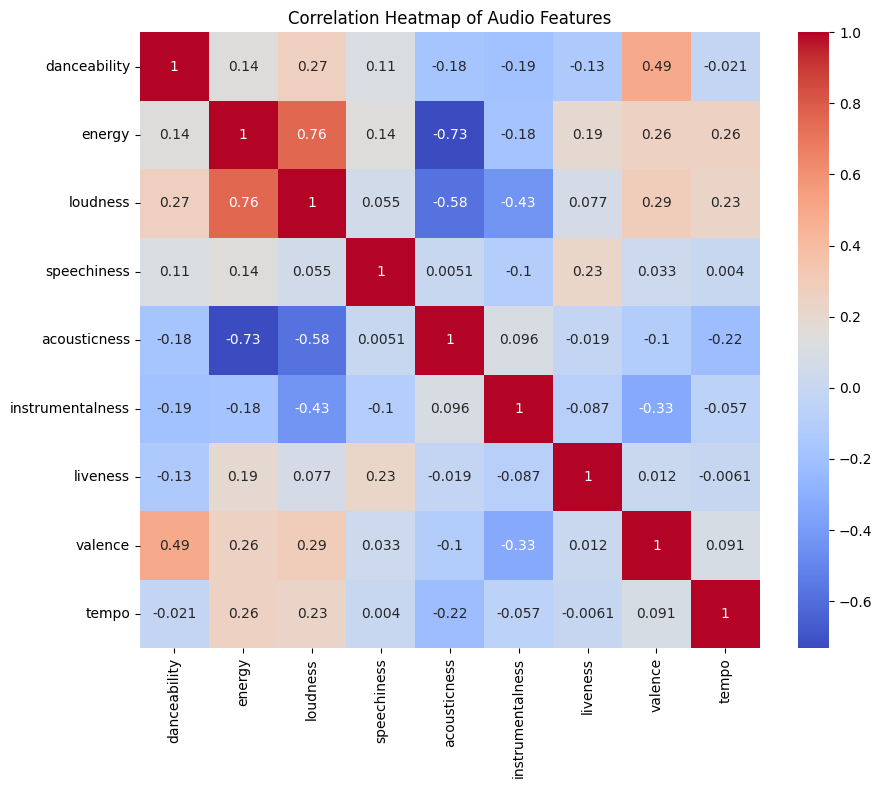

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_generel[features_to_analyze].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Audio Features")
plt.show()

### Correlated features

- Danceability & valence (0.49)

    There is a moderate correlation here, suggesting that more danceable tracks are often perceived as more positive or upbeat. This could help in defining mood-based clusters.
- Energy & loudness (0.76)
    
    These are closely related, which is expected since louder songs tend to feel more energetic. We might consider keeping only one of these features for clustering to avoid redundancy.
- Energy & acousticness (-0.73)
    
    This negative correlation is interesting and suggests that more energetic tracks are less likely to be acoustic. This is a useful insight, as separating acoustic from non-acoustic music could be a key component in clustering different genres or styles.



### Weak features

It looks like features like (liveness, tempo, valence) have mostly weak correlations that are close to 0.

Features like liveness, tempo, and valence having weak correlations with other features mean that they are fairly independent, and might provide unique insights into clustering. For instance, tempo could be a valuable distinguishing factor for different types of tracks (e.g., fast vs. slow songs).


Since energy and loudness are highly correlated, we could drop one (probably loudness since energy captures more) to reduce dimensionality.

## Feature importance

To identify which features are most predictive of genres.

/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_98754/304715038.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


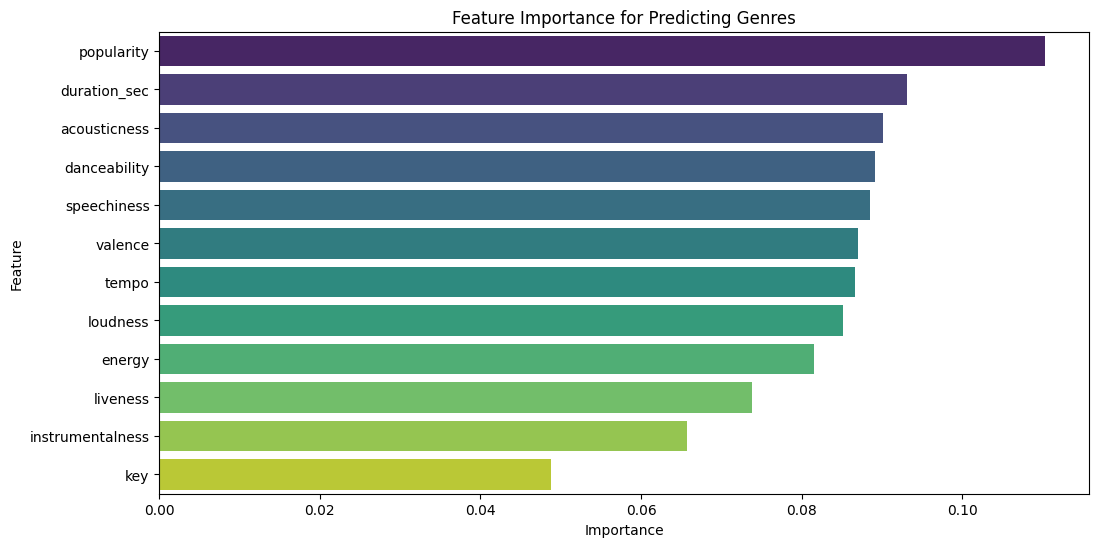

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load balanced dataset
df_balanced = pd.read_csv('balanced_data.csv')


# Define features (X) and target (y)
# Select all columns except 'genre_label' as features (First run)
# X = df_balanced.select_dtypes(include=['float64', 'int64']).drop(columns=['genre_label'])
## Removed more features after first run:
X = df_balanced.select_dtypes(include=['float64', 'int64']).drop(columns=['genre_label','mode','num_artists','time_signature'])

y = df_balanced['genre_label']

# Ensure lengths match
assert len(X) == len(y), "Lengths of X and y are inconsistent!"

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance for Predicting Genres")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


The most important features for predicting genres in the dataset are:

Popularity: This is the most influential feature, likely because certain genres are more popular than others on Spotify.
Duration (duration_sec): The length of the song also strongly correlates with genre, as some genres tend to have longer or shorter tracks (e.g., classical vs. pop).
Acousticness: Indicates how acoustic a track is. Acoustic genres like folk or classical might differ significantly from electronic or hip-hop.


Moderately important:

Danceability, Speechiness, Valence, Tempo, Loudness, Energy: These audio features have moderate importance and are expected to influence genres. 

For example:
Danceability is likely higher for electronic or pop genres compared to classical music.
Speechiness may help distinguish rap/hip-hop from other genres.
Valence (positivity) could differentiate upbeat genres like pop from melancholic ones like blues.


Low importance:

Liveness, Instrumentalness, Key, Num Artists, Mode, Time Signature:
These features have lower predictive power but might still add subtle distinctions between genres.

## Correlation matrix for genres
To analyze feature correlations grouped by genre for genre-specific insights.

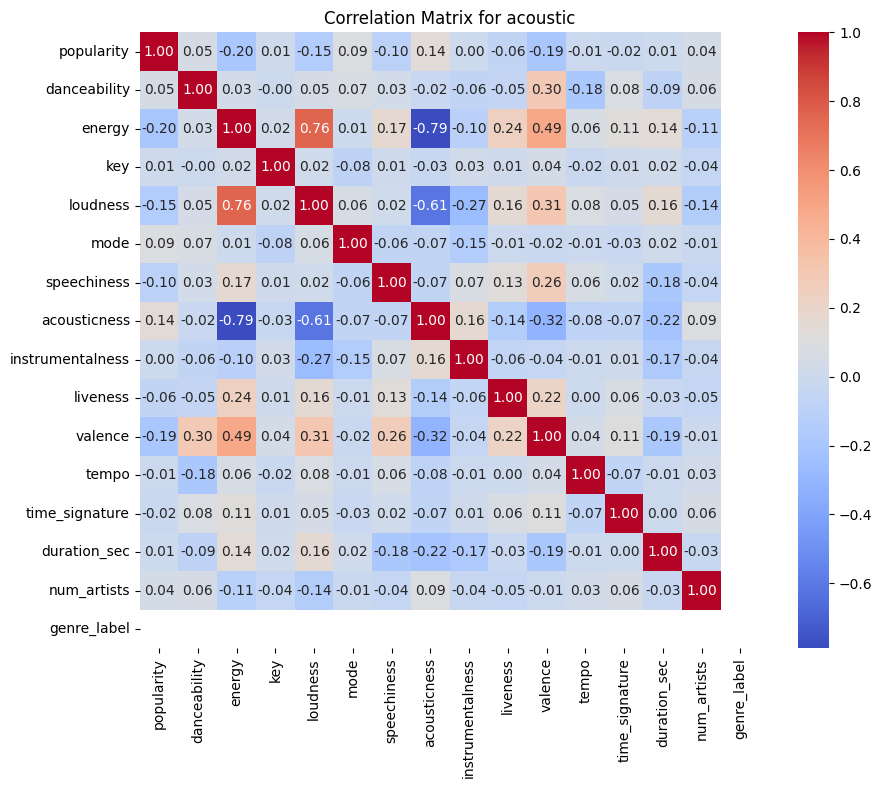

In [49]:
# Compute correlation matrices for each genre
genre_corrs = {}
for genre, group in df_generel.groupby('track_genre'):
    # Select only numeric columns for correlation computation
    numeric_group = group.select_dtypes(include=['float64', 'int64'])
    genre_corrs[genre] = numeric_group.corr()

# Visualize correlations for a single genre (example: 'Pop')
selected_genre = 'acoustic'  # Replace with any genre name from your dataset
if selected_genre in genre_corrs:
    plt.figure(figsize=(10, 8))
    sns.heatmap(genre_corrs[selected_genre], annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {selected_genre}")
    plt.show()
else:
    print(f"Genre '{selected_genre}' not found in data.")
